In [1]:
from librerias import *

In [2]:
ruta_archivo = 'Data/btc_limp.csv' 

btc = pd.read_csv(ruta_archivo)
btc.set_index('Date', inplace=True)

btc.head ()

,Open,Change %
Date,,
2024-03-18,68389,-1.17
2024-03-17,65314,4.71
2024-03-16,69456,-5.97
2024-03-15,71387,-2.69
2024-03-14,73066,-2.30


In [3]:
# Convertir el índice a tipo datetime si no lo está
btc.index = pd.to_datetime(btc.index)

# Seleccionar el último día de cada mes
btc_mes = btc.resample('ME').last()

btc_mes = btc_mes.loc['2014-01-05':]
# Mostrar el DataFrame resultante
print(btc_mes)


             Open  Change %
Date                       
2014-01-31    941     -0.27
2014-02-28    596     -3.78
2014-03-31    446     -0.51
2014-04-30    446     -0.11
2014-05-31    612      2.54
...           ...       ...
2023-11-30  37857     -0.38
2023-12-31  42141      0.32
2024-01-31  42946     -0.85
2024-02-29  62467     -2.08
2024-03-31  68389     -1.17

[123 rows x 2 columns]


In [4]:
btc_meskop = btc_mes ['Open']
btc_meskop = pd.DataFrame (btc_meskop)

btc_meskop

btc_sin_up = btc_meskop.copy ()
btc_sin_up = pd.DataFrame (btc_sin_up)
btc_sin_up.index = pd.to_datetime(btc_sin_up.index)
btc_sin_up_down = btc_meskop.copy ()
btc_sin_up_down = pd.DataFrame (btc_sin_up_down)
btc_sin_up_down.index = pd.to_datetime(btc_sin_up_down.index)


In [5]:

btc_meskop['EWM200'] = btc_meskop['Open'].ewm(span=200).mean()
btc_meskop['MA30'] = btc_meskop ['Open'].rolling (30).mean ()

btc_meskop ['>EWM200'] = np.where (btc_meskop ['Open'] > btc_meskop ['EWM200'],1,0)
btc_meskop ['>MA30'] = np.where (btc_meskop ['Open'] > btc_meskop ['MA30'],1,0)

btc_meskop ['retornos']= btc_meskop ['Open'].pct_change ().round (2)

mejores = btc_meskop.loc[btc_meskop['retornos'].nlargest(10).index]
peores = btc_meskop.loc[btc_meskop['retornos'].nsmallest(15).index]

In [6]:
mejores200 = btc_meskop.reindex (index = mejores.index)['>EWM200'].sum ()
mejores30 = btc_meskop.reindex (index = mejores.index)['>MA30'].sum ()
peores200 = btc_meskop.reindex (index = peores.index)['>EWM200'].sum ()
peores30 = btc_meskop.reindex (index = peores.index)['>MA30'].sum ()

In [7]:
mejores200

9

In [8]:
#diez = btc_meskop ['retornos'].sort_values (ascending=False)[10:].reindex (index = btc_meskop.index).dropna ().rename ("-10 mejor")
#acumul = (1+diez).cumprod ()

In [9]:
btc_sin_up = btc_sin_up.drop(mejores.index)

btc_sin_up ['retornos']= btc_sin_up ['Open'].pct_change ().round (2)

btc_sin_up ['ganancias'] = (1 + btc_sin_up['retornos']).cumprod()

btc_sin_up

,Open,retornos,ganancias
Date,,,
2014-01-31,941,NaN,NaN
2014-02-28,596,-0.37,0.630000
2014-03-31,446,-0.25,0.472500
2014-04-30,446,0.00,0.472500
2014-05-31,612,0.37,0.647325
...,...,...,...
2023-10-31,34478,0.28,36.161633
2023-11-30,37857,0.10,39.777796
2023-12-31,42141,0.11,44.153354


In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Muestra el DataFrame completo
print(btc_sin_up)

             Open  retornos  ganancias
Date                                  
2014-01-31    941       NaN        NaN
2014-02-28    596     -0.37   0.630000
2014-03-31    446     -0.25   0.472500
2014-04-30    446      0.00   0.472500
2014-05-31    612      0.37   0.647325
2014-06-30    601     -0.02   0.634379
2014-07-31    564     -0.06   0.596316
2014-08-31    506     -0.10   0.536684
2014-09-30    376     -0.26   0.397146
2014-10-31    344     -0.09   0.361403
2014-11-30    376      0.09   0.393929
2014-12-31    311     -0.17   0.326961
2015-01-31    231     -0.26   0.241951
2015-02-28    253      0.10   0.266147
2015-03-31    246     -0.03   0.258162
2015-04-30    225     -0.09   0.234928
2015-05-31    233      0.04   0.244325
2015-06-30    257      0.10   0.268757
2015-07-31    287      0.12   0.301008
2015-08-31    228     -0.21   0.237796
2015-09-30    236      0.04   0.247308
2015-11-30    370      0.57   0.388274
2015-12-31    427      0.15   0.446515
2016-01-31    377     -0.

In [11]:
retorno_acumulado = (1 + btc_meskop['retornos']).cumprod()

print (retorno_acumulado)

Date
2014-01-31          NaN
2014-02-28     0.630000
2014-03-31     0.472500
2014-04-30     0.472500
2014-05-31     0.647325
2014-06-30     0.634379
2014-07-31     0.596316
2014-08-31     0.536684
2014-09-30     0.397146
2014-10-31     0.361403
2014-11-30     0.393929
2014-12-31     0.326961
2015-01-31     0.241951
2015-02-28     0.266147
2015-03-31     0.258162
2015-04-30     0.234928
2015-05-31     0.244325
2015-06-30     0.268757
2015-07-31     0.301008
2015-08-31     0.237796
2015-09-30     0.247308
2015-10-31     0.343758
2015-11-30     0.388447
2015-12-31     0.446714
2016-01-31     0.393108
2016-02-29     0.452075
2016-03-31     0.429471
2016-04-30     0.472418
2016-05-31     0.552729
2016-06-30     0.663275
2016-07-31     0.683173
2016-08-31     0.601192
2016-09-30     0.631252
2016-10-31     0.725940
2016-11-30     0.762237
2016-12-31     0.998530
2017-01-31     0.958589
2017-02-28     1.236580
2017-03-31     1.075824
2017-04-30     1.387813
2017-05-31     2.276014
2017-06-30 

<Axes: xlabel='Date'>

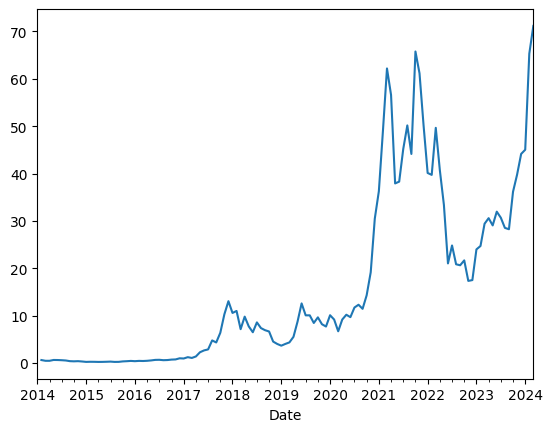

In [12]:
retorno_acumulado.plot ()